# Weather Data

### The weather data is gathered from:

https://www.ncei.noaa.gov/access/homr/

https://www.ncei.noaa.gov/pub/data/ghcn/daily/

The "Global Historical Climatology Network daily" contains weather data for all countries in the world:

https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-countries.txt

#### Measures:
The weather data is measured on a weather station x day level. We've processed three different fields for you:
- Average Temperature (TAVG)
- Minimum Temperature (TMIN)
- Maximum temperature (TMAX)

#### Aggregation:
The data is aggregated to a country x month level using the following logic:
- For a specific day take the national average for all three fields (TMIN, TAVG, TMAX)
- For a specific country and a specific month take the average of TAVG, the minimum of TMIN and the maximum of TMAX)


In [48]:
import pandas as pd
import datetime

weather_data = pd.read_csv("weather_data/global_temperature_data.csv")
weather_data["yearmonth"] = pd.to_datetime(weather_data["yearmonth"], format = '%Y%m').dt.date

#### View of the data:

In [49]:
print(weather_data.sort_values(by = ['yearmonth'], ascending=False).head(5))

      partner_labels  partner_code weather_countrycode weather_countryname  \
21089       Viet Nam           690                  VM             Vietnam   
9067          Israel           624                  IS              Israel   
4342          Cyprus           600                  CY              Cyprus   
10772         Kuwait           636                  KU              Kuwait   
19582        Türkiye            52                  TU              Turkey   

      iso_countrycode   yearmonth    AVG_TAVG  MIN_TMIN    MAX_TMAX  
21089              VN  2022-12-01  179.500000   123.000  248.000000  
9067               IL  2022-12-01  150.650000    48.000  261.000000  
4342               CY  2022-12-01  160.117647    99.000  230.000000  
10772              KW  2022-12-01  171.225806    82.000  269.666667  
19582              TR  2022-12-01   91.099482     0.375  187.312500  


#### Plot of the data:

<AxesSubplot: xlabel='yearmonth'>

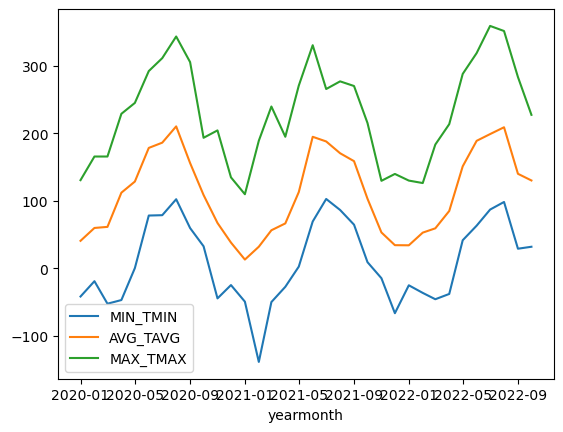

In [50]:
date_filter = datetime.date(year=2020,month=1,day=1)

weather_data[(weather_data['weather_countrycode']=='GM')&(weather_data['yearmonth']>=date_filter)]\
[['yearmonth', 'MIN_TMIN', 'AVG_TAVG','MAX_TMAX']]\
.set_index('yearmonth').plot()



<AxesSubplot: xlabel='yearmonth'>

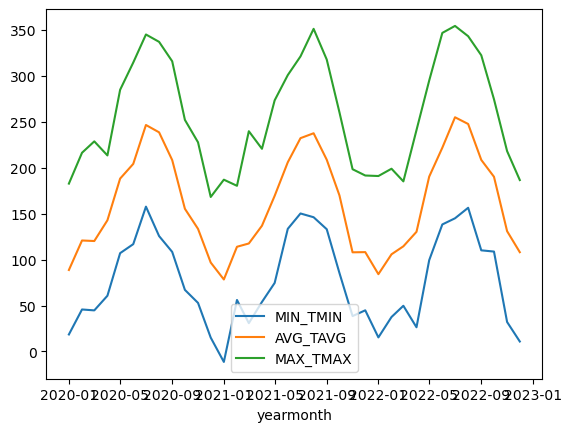

In [51]:
date_filter = datetime.date(year=2020,month=1,day=1)

weather_data[(weather_data['weather_countrycode']=='SP')&(weather_data['yearmonth']>=date_filter)]\
[['yearmonth', 'MIN_TMIN', 'AVG_TAVG','MAX_TMAX']]\
.set_index('yearmonth').plot()

